# 代表値の特徴

データ分布に偏りがあると3つの代表値の間に差異が生じます．
ここでは，代表値の特徴について学習します．

## サンプルデータ

ここでは，50個のサンプルについて保証期間の10倍の期間を想定した耐久検査を行ったときに発生した不具合の件数を記録しました．
このデータの分布と代表値の関係を確認します．

```Python
    0,0,0,1,1,1,1,1,1,1,
    1,1,1,2,2,2,2,2,2,2,
    2,2,3,3,3,3,3,3,3,3,
    4,4,4,4,4,4,5,5,5,5,
    6,6,6,7,8,8,9,10,20,24
```

## プログラムによる確認

ここに記述したプログラムは既に学習済みなので，解説は省略します．

まず，必要なライブラリーを搬入します．

```Python
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### データフレームの生成

サンプルデータを元にしてデータフレームを生成します．

```Python
sample = [0,0,0,1,1,1,1,1,1,1,
          1,1,1,2,2,2,2,2,2,2,
          2,2,3,3,3,3,3,3,3,3,
          4,4,4,4,4,4,5,5,5,5,
          6,6,6,7,8,8,9,10,20,24]
df = pd.DataFrame(sample,columns=['defects'])
```

In [2]:
sample = [0,0,0,1,1,1,1,1,1,1,
          1,1,1,2,2,2,2,2,2,2,
          2,2,3,3,3,3,3,3,3,3,
          4,4,4,4,4,4,5,5,5,5,
          6,6,6,7,8,8,9,10,20,24]
df = pd.DataFrame(sample,columns=['defects'])

### 代表値の確認

データフレームのデータから平均値，中央値，最頻値を求めます．
なお，最頻値については数値データが離散的なため値そのものが階級になっています．

```Python
print('平均値',df.defects.mean())
print('中央値',df.defects.median())
print('最頻値',df.defects.mode()[0])
```

In [3]:
print('平均値',df.defects.mean())
print('中央値',df.defects.median())
print('最頻値',df.defects.mode()[0])

平均値 4.0
中央値 3.0
最頻値 1


この例では，3つの代表値が異なる値になっています．
この差異は，データ分布によって引き起こされています．
したがって，ヒストグラムと代表値を一緒に眺めることが大切です．

### 度数分布表

度数分布表を作成します．

```Python
fdt = pd.DataFrame(df.defects.value_counts())
fdt.rename(columns={'defects':'frequency'},inplace=True)
fdt.sort_index(inplace=True)
```

In [4]:
fdt = pd.DataFrame(df.defects.value_counts())
fdt.rename(columns={'defects':'frequency'},inplace=True)
fdt.sort_index(inplace=True)

### ヒストグラム

サンプルデータのヒストグラムを作成し，その上に平均値，中央値，最頻値を記載します．

```Python
plt.bar(fdt.index,fdt.frequency,width=1,color='lightcyan',edgecolor='black')
plt.vlines(df.defects.mean(),0,11,color='blue',linestyles='dashed',label='mean')
plt.vlines(df.defects.median(),0,11,color='green',linestyles='dashed',label='median')
plt.vlines(df.defects.mode()[0],0,11,color='red',linestyles='dashed',label='mode')
plt.legend()
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.show()
```

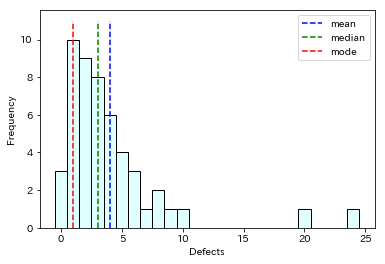

In [5]:
plt.bar(fdt.index,fdt.frequency,width=1,color='lightcyan',edgecolor='black')
plt.vlines(df.defects.mean(),0,11,color='blue',linestyles='dashed',label='mean')
plt.vlines(df.defects.median(),0,11,color='green',linestyles='dashed',label='median')
plt.vlines(df.defects.mode()[0],0,11,color='red',linestyles='dashed',label='mode')
plt.legend()
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.show()

### 代表値の独り歩きを避ける

代表値を求める前にヒストグラムでデータ分布を確認することが重要です．
特に，このように左右対称でない場合は平均値だけを公表することは危険です．

*****
## 代表値の特徴

平均値，中央値，最頻値には，下表のような長所，短所があります．

|代表値|長所|短所|
|:---:|:---:|:---:|
|平均値|計算処理上，扱いやすい|外れ値の影響を受けやすい|
|中央値|外れ値やのノイズに対して安定性がある|データの並べ替え作業が発生する|
|最頻値|カテゴリーデータに対しても求められる|階級の設定に依存する|

### 外れ値の影響を考慮したら中央値

サンプルデータの平均値と中央値を比較すると，平均値の方が高くなっています．
この理由は，ヒストグラムの右側に大きな値を取っているデータがあり，この値に引きずられて平均値が大きくなっています．

これに対して中央値は，最大値がどんなに大きくなっても引きずられることはありません．
したがって，<font color=blue>中央値はノイズに強い代表値</font>という事ができます．

一般に度数分布が左右歪になっている場合は，代表値として平均値を採用しないことがデータ分析の常識となっています．

### カテゴリーデータには最頻値

カテゴリーデータの代表値としては最頻値しか取得できません．
満足度などを便宜的に5段階で示して，その平均値を計算することもありますが，それはお勧めできる方法ではありません．

カテゴリーデータの例として，日本人の血液型の分布を見て見ましょう．

|血液型|割合|
|:---:|:---:|
| A | 40% |
| B | 20% |
| O | 30% |
|AB | 10% |

このデータには平均値や中央値の概念が適用できません．
最頻値については，血液型A型が40%で最頻値であることが分かります．

### 平均値が重宝する例

3つのグループの観測データがあり，それぞれの平均値，中央値，最頻値が求まっています．

|グループ|データ件数|平均値|中央値|最頻値|
|:---:|:---:|:---:|:---:|:---:|
| A | 20 | 70 | 70 | 70 |
| B | 30 | 60 | 60 | 60 |
| C | 50 | 40 | 40 | 40 |

この代表値から全体（A+B+C）の平均値，中央値，最頻値を求めることを考えます．
中央値と最頻値は，元データをまとめたデータを作成して，そこから求めることになります．
しかし平均値については，グループの平均値の加重平均によって求めることができます．

$$ \bar{x}_{A+B+C} = \frac{20{\times}70+30{\times}60+50{\times}40}{20+30+50} = 52 $$

*****